In [91]:
import pandas as pd
import gzip
import requests
from io import BytesIO

In [92]:
# Define the base URL and buoy ID information
base_url = 'https://www.ndbc.noaa.gov/view_text_file.php?filename='
buoy_id = '46237'
data_dir = 'data/stdmet/'

# Define date range starting from January 2024 to June 2024
start_date = '2024-01'
end_date = '2024-07'

# Generate the list of month names and years
months = pd.date_range(start=start_date, end=end_date, freq='ME').strftime('%b')  # e.g., 'Jan', 'Feb'
years = pd.date_range(start=start_date, end=end_date, freq='ME').strftime('%Y')
month_nums = pd.date_range(start=start_date, end=end_date, freq='ME').strftime('%m')  # for filename formatting

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each month and year to download and concatenate data
for month, year, month_num in zip(months, years, month_nums):
    filename = f"{buoy_id}{int(month_num)}{year}.txt.gz"  # Format as MMYYYY (e.g., '4623712024' for January 2024)
    url = f"{base_url}{filename}&dir={data_dir}{month}/"
    
    try:
        response = requests.get(url)
        response.raise_for_status()
        
        # Attempt to read the file (gzipped or plain text)
        try:
            with gzip.open(BytesIO(response.content), 'rt') as file:
                df = pd.read_csv(file, delim_whitespace=True, skiprows=1)
                dfs.append(df)
                print(f"Downloaded data for {month} {year}")
        except gzip.BadGzipFile:
            df = pd.read_csv(BytesIO(response.content), delim_whitespace=True, skiprows=1)
            dfs.append(df)
            print(f"Downloaded data for {month} {year}")
            
    except requests.exceptions.RequestException as e:
        print(f"Could not retrieve data for {month} {year}: {e}")

# Concatenate all monthly DataFrames into one DataFrame
all_data = pd.concat(dfs, ignore_index=True)

# Display the concatenated DataFrame
print(all_data)


/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_2345/3270662212.py:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, skiprows=1)
/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_2345/3270662212.py:34: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(BytesIO(response.content), delim_whitespace=True, skiprows=1)
/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_2345/3270662212.py:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, skiprows=1)
/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_2345/3270662212.py:34: FutureWarning: The 'delim_whitespace' keyword

Downloaded data for Jan 2024
Downloaded data for Feb 2024


/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_2345/3270662212.py:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, skiprows=1)
/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_2345/3270662212.py:34: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(BytesIO(response.content), delim_whitespace=True, skiprows=1)
/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_2345/3270662212.py:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, skiprows=1)
/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_2345/3270662212.py:34: FutureWarning: The 'delim_whitespace' keyword

Downloaded data for Mar 2024
Downloaded data for Apr 2024


/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_2345/3270662212.py:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, skiprows=1)
/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_2345/3270662212.py:34: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(BytesIO(response.content), delim_whitespace=True, skiprows=1)


Downloaded data for May 2024
Downloaded data for Jun 2024
       #yr  mo  dy  hr  mn  degT   m/s  m/s.1     m    sec  sec.1  deg  \
0     2024   1   9  19   0   999  99.0   99.0  1.28  11.76   5.50  276   
1     2024   1   9  19  30   999  99.0   99.0  1.33  13.33   5.43  270   
2     2024   1   9  20   0   999  99.0   99.0  1.42  12.50   5.60  278   
3     2024   1   9  20  30   999  99.0   99.0  1.53  11.76   5.44  281   
4     2024   1   9  21   0   999  99.0   99.0  1.57  11.76   5.57  287   
...    ...  ..  ..  ..  ..   ...   ...    ...   ...    ...    ...  ...   
8265  2024   6  30  21  30   999  99.0   99.0  1.80   7.14   5.25  287   
8266  2024   6  30  22   0   999  99.0   99.0  1.76   7.41   5.15  288   
8267  2024   6  30  22  30   999  99.0   99.0  1.81   6.90   5.20  288   
8268  2024   6  30  23   0   999  99.0   99.0  1.84   7.41   5.17  291   
8269  2024   6  30  23  30   999  99.0   99.0  1.77   7.41   5.07  289   

         hPa   degC  degC.1  degC.2   nmi    ft  
0  

/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_2345/3270662212.py:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, skiprows=1)
/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_2345/3270662212.py:34: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(BytesIO(response.content), delim_whitespace=True, skiprows=1)


In [93]:
all_data['Datetime'] = all_data[['#yr', 'mo', 'dy', 'hr', 'mn']].astype(str).agg(':'.join, axis=1)
all_data['Datetime'] = pd.to_datetime(all_data['Datetime'], format='%Y:%m:%d:%H:%M')
all_data = all_data.drop(columns=['#yr', 'mo', 'dy', 'hr', 'mn'])
all_data.head(10)

,degT,m/s,m/s.1,m,sec,sec.1,deg,hPa,degC,degC.1,degC.2,nmi,ft,Datetime
0,999,99.0,99.0,1.28,11.76,5.50,276,9999.0,999.0,13.4,999.0,99.0,99.0,2024-01-09 19:00:00
1,999,99.0,99.0,1.33,13.33,5.43,270,9999.0,999.0,13.4,999.0,99.0,99.0,2024-01-09 19:30:00
2,999,99.0,99.0,1.42,12.50,5.60,278,9999.0,13.2,13.4,999.0,99.0,99.0,2024-01-09 20:00:00
3,999,99.0,99.0,1.53,11.76,5.44,281,9999.0,13.3,13.4,999.0,99.0,99.0,2024-01-09 20:30:00
4,999,99.0,99.0,1.57,11.76,5.57,287,9999.0,13.3,13.4,999.0,99.0,99.0,2024-01-09 21:00:00
5,999,99.0,99.0,1.62,10.53,5.82,290,9999.0,13.1,13.3,999.0,99.0,99.0,2024-01-09 21:30:00
6,999,99.0,99.0,1.66,5.41,5.64,281,9999.0,13.1,13.3,999.0,99.0,99.0,2024-01-09 22:00:00
7,999,99.0,99.0,1.56,11.76,5.72,285,9999.0,13.1,13.3,999.0,99.0,99.0,2024-01-09 22:30:00
8,999,99.0,99.0,1.65,5.26,5.51,286,9999.0,13.0,13.4,999.0,99.0,99.0,2024-01-09 23:00:00
9,999,99.0,99.0,1.73,4.65,5.50,289,9999.0,12.8,13.2,999.0,99.0,99.0,2024-01-09 23:30:00


In [94]:
#now add 2023
# Load 2023 data
url_2023 = 'https://www.ndbc.noaa.gov/view_text_file.php?filename=46237h2023.txt.gz&dir=data/historical/stdmet/'
try:
    response = requests.get(url_2023)
    response.raise_for_status()
    
    # Try reading as gzipped; if it fails, read as plain text
    try:
        # Attempt to read as a gzipped file
        with gzip.open(BytesIO(response.content), 'rt') as file:
            data_2023 = pd.read_csv(file, delim_whitespace=True, skiprows=1)
            print("Downloaded 2023 data as gzipped")
    except gzip.BadGzipFile:
        # If not gzipped, read as plain text
        data_2023 = pd.read_csv(BytesIO(response.content), delim_whitespace=True, skiprows=1)
        print("Downloaded 2023 data as plain text")
except requests.exceptions.RequestException as e:
    print(f"Could not retrieve 2023 data: {e}")

data_2023['Datetime'] = data_2023[['#yr', 'mo', 'dy', 'hr', 'mn']].astype(str).agg(':'.join, axis=1)
data_2023['Datetime'] = pd.to_datetime(data_2023['Datetime'], format='%Y:%m:%d:%H:%M')
data_2023 = data_2023.drop(columns=['#yr', 'mo', 'dy', 'hr', 'mn'])
data_2023.tail(10)

Downloaded 2023 data as plain text


/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_2345/904899138.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_2023 = pd.read_csv(file, delim_whitespace=True, skiprows=1)
/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_2345/904899138.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_2023 = pd.read_csv(BytesIO(response.content), delim_whitespace=True, skiprows=1)


,degT,m/s,m/s.1,m,sec,sec.1,degT.1,hPa,degC,degC.1,degC.2,mi,ft,Datetime
17302,999,99.0,99.0,3.77,14.29,10.89,272,9999.0,999.0,13.8,999.0,99.0,99.0,2023-12-28 09:30:00
17303,999,99.0,99.0,4.18,14.29,11.95,266,9999.0,13.9,13.8,999.0,99.0,99.0,2023-12-28 10:00:00
17304,999,99.0,99.0,4.61,14.29,11.99,268,9999.0,13.6,13.8,999.0,99.0,99.0,2023-12-28 10:30:00
17305,999,99.0,99.0,5.11,20.00,12.33,268,9999.0,13.6,13.8,999.0,99.0,99.0,2023-12-28 11:00:00
17306,999,99.0,99.0,5.34,15.38,12.47,270,9999.0,13.4,13.8,999.0,99.0,99.0,2023-12-28 11:30:00
17307,999,99.0,99.0,5.78,18.18,12.65,271,9999.0,13.5,13.8,999.0,99.0,99.0,2023-12-28 12:00:00
17308,999,99.0,99.0,5.95,20.00,12.98,264,9999.0,12.9,13.8,999.0,99.0,99.0,2023-12-28 12:30:00
17309,999,99.0,99.0,5.51,18.18,12.81,266,9999.0,12.9,13.8,999.0,99.0,99.0,2023-12-28 13:00:00
17310,999,99.0,99.0,5.87,15.38,12.99,272,9999.0,13.2,13.8,999.0,99.0,99.0,2023-12-28 13:30:00
17311,999,99.0,99.0,6.21,20.00,12.49,267,9999.0,13.1,13.7,999.0,99.0,99.0,2023-12-28 14:00:00


In [95]:
all_data = pd.concat([data_2023, all_data], ignore_index=True)
all_data.head(10)

,degT,m/s,m/s.1,m,sec,sec.1,degT.1,hPa,degC,degC.1,degC.2,mi,ft,Datetime,deg,nmi
0,999,99.0,99.0,2.51,13.33,8.72,275.0,9999.0,10.6,11.7,999.0,99.0,99.0,2023-01-01 00:00:00,NaN,NaN
1,999,99.0,99.0,2.88,14.29,8.87,271.0,9999.0,10.5,11.7,999.0,99.0,99.0,2023-01-01 00:30:00,NaN,NaN
2,999,99.0,99.0,2.72,14.29,8.06,269.0,9999.0,999.0,11.7,999.0,99.0,99.0,2023-01-01 01:00:00,NaN,NaN
3,999,99.0,99.0,2.80,14.29,8.57,275.0,9999.0,999.0,11.7,999.0,99.0,99.0,2023-01-01 01:30:00,NaN,NaN
4,999,99.0,99.0,2.52,14.29,7.89,276.0,9999.0,999.0,11.7,999.0,99.0,99.0,2023-01-01 02:00:00,NaN,NaN
5,999,99.0,99.0,2.71,13.33,8.46,276.0,9999.0,11.6,11.8,999.0,99.0,99.0,2023-01-01 02:30:00,NaN,NaN
6,999,99.0,99.0,2.49,13.33,8.23,277.0,9999.0,11.8,11.8,999.0,99.0,99.0,2023-01-01 03:00:00,NaN,NaN
7,999,99.0,99.0,2.65,14.29,8.21,274.0,9999.0,11.8,11.8,999.0,99.0,99.0,2023-01-01 03:30:00,NaN,NaN
8,999,99.0,99.0,2.68,14.29,8.48,275.0,9999.0,11.7,11.8,999.0,99.0,99.0,2023-01-01 04:00:00,NaN,NaN
9,999,99.0,99.0,2.69,14.29,8.05,274.0,9999.0,11.6,11.8,999.0,99.0,99.0,2023-01-01 04:30:00,NaN,NaN


In [96]:
# Set 'Datetime' as the index
all_data.set_index('Datetime', inplace=True)

# Trim the data to the specified time range
all_data = all_data.loc["2023-06-21 15:00:00":"2024-06-20 20:30:00"]
all_data = all_data.resample('30T').asfreq()

/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_2345/1151996627.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  all_data = all_data.resample('30T').asfreq()


In [97]:
all_data = all_data.resample('30min').asfreq()
all_data.shape

(17532, 15)

In [98]:
all_data = all_data.drop(columns=['degT', 'm/s', 'm/s.1', 'degT.1', 'hPa', 'degC.2', 'mi', 'ft','nmi'])

In [99]:
all_data.replace([99.0, 999.0], pd.NA, inplace=True)  # Replace 99.0 and 999.0 with NaN
all_data.ffill(inplace=True)
all_data = all_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
all_data.head()

/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_2345/2113080896.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_data.ffill(inplace=True)


,m,sec,sec.1,degC,degC.1,deg
Datetime,,,,,,
2023-06-21 15:00:00,0.114094,0.703367,0.252874,0.290541,0.510204,NaN
2023-06-21 15:30:00,0.110738,0.576162,0.199507,0.324324,0.540816,NaN
2023-06-21 16:00:00,0.120805,0.634420,0.237274,0.371622,0.622449,NaN
2023-06-21 16:30:00,0.130872,0.634420,0.256158,0.371622,0.673469,NaN
2023-06-21 17:00:00,0.124161,0.634420,0.222496,0.398649,0.724490,NaN


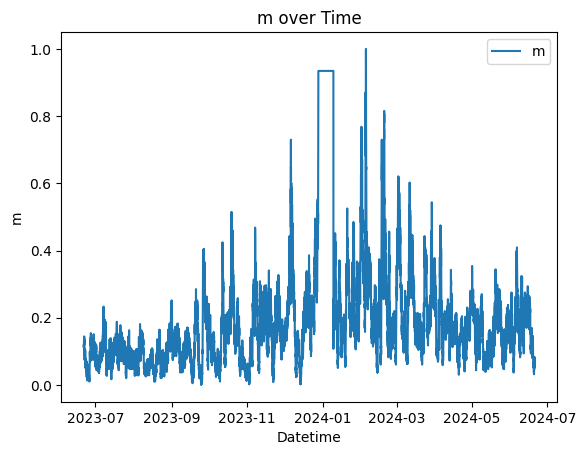

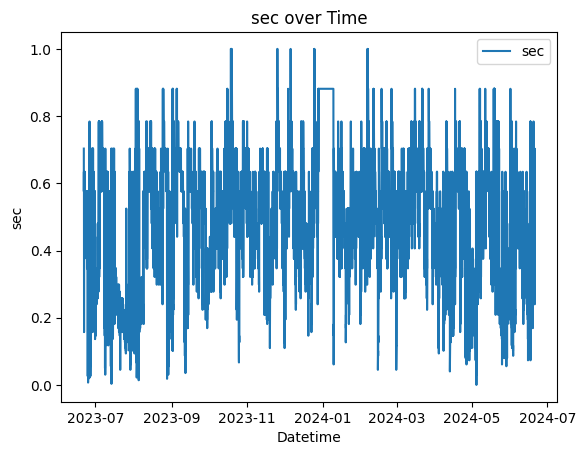

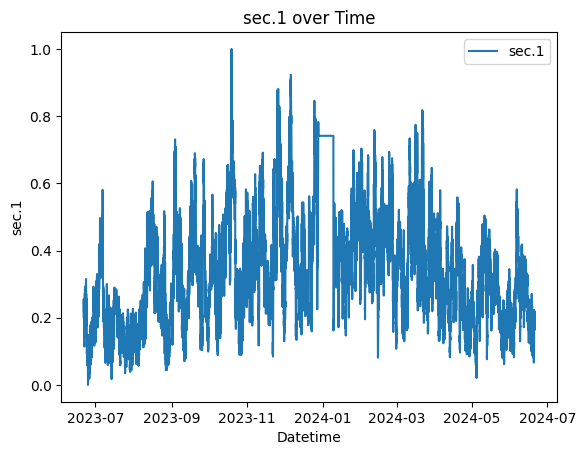

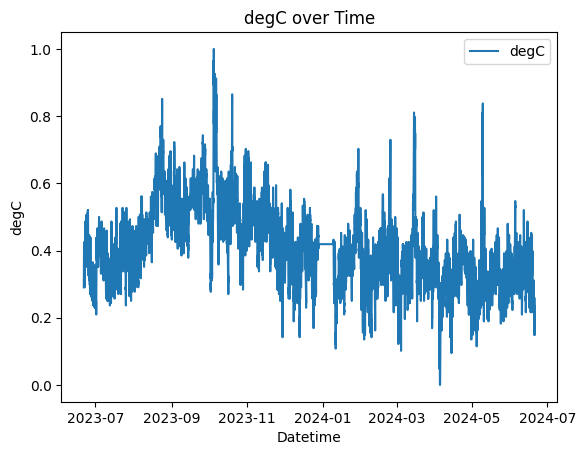

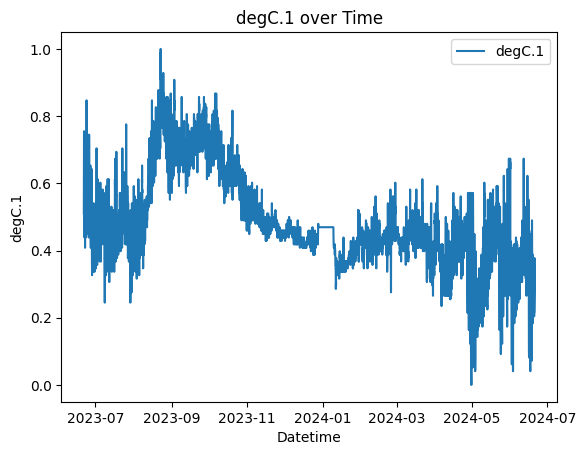

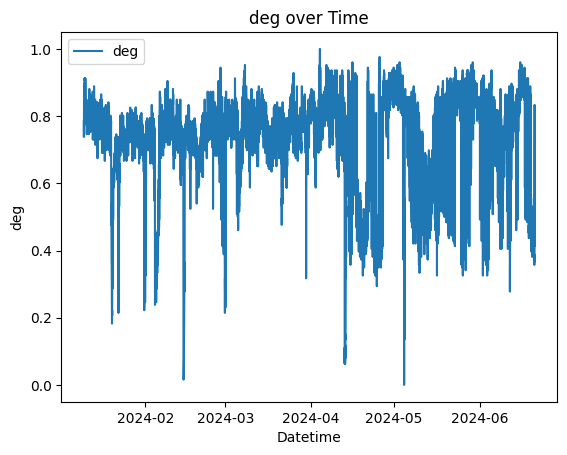

In [100]:
import matplotlib.pyplot as plt
columns_to_plot = ['m', 'sec', 'sec.1', 'degC', 'degC.1', 'deg']

# Plot each column individually
for column in columns_to_plot:
    plt.figure()
    plt.plot(all_data.index, all_data[column], label=column)
    plt.xlabel('Datetime')
    plt.ylabel(column)
    plt.title(f'{column} over Time')
    plt.legend()
    plt.show()

In [101]:
all_data.to_csv('../data/buoy_'+buoy_id+'_23_24.csv', index = True)